In [6]:
#dataset used Auto MPG Dataset
#prediction? 
#fuel efficiency of late-1970s and early 1980s automobiles

In [7]:
#import pkgs
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [40]:
#get dataset
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

column_names=[ "mpg",
 "cylinders",
 "displacement",
 "horsepower",
 "weight",
 "acceleration",
 "model year",
 "origin"
 ]

raw_dataset = pd.read_csv(data_url, names=column_names,
                        na_values="?", comment="\t",
                        sep=" ", skipinitialspace=True)

In [41]:
dataset = raw_dataset.copy()
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [42]:
#clean data
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [43]:
#horsepower has 6 missing values so dropping/deleting 6 rows
# inorder to simplify the process of building model
dataset = dataset.dropna()

In [44]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [45]:
# #origin is categorical
# dataset["origin"] = dataset["origin"].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset["origin"]

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 392, dtype: int64

In [46]:
# dataset = pd.get_dummies(dataset, columns=["origin"], prefix="", prefix_sep="")
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [47]:
#split data
train_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(train_data.index)

In [48]:
train_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
146,28.0,4,90.0,75.0,2125.0,14.5,74,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,3
...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,3
145,32.0,4,83.0,61.0,2003.0,19.0,74,3


In [49]:
test_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
9,15.0,8,390.0,190.0,3850.0,8.5,70,1
25,10.0,8,360.0,215.0,4615.0,14.0,70,1
28,9.0,8,304.0,193.0,4732.0,18.5,70,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,3
33,19.0,6,232.0,100.0,2634.0,13.0,71,1
...,...,...,...,...,...,...,...,...
369,34.0,4,112.0,88.0,2395.0,18.0,82,1
375,36.0,4,105.0,74.0,1980.0,15.3,82,2
382,34.0,4,108.0,70.0,2245.0,16.9,82,3
384,32.0,4,91.0,67.0,1965.0,15.7,82,3


In [30]:
train_data["weight"]

146    2125.0
282    2890.0
69     4456.0
378    2125.0
331    2145.0
        ...  
281    2990.0
229    4220.0
150    2391.0
145    2003.0
182    2464.0
Name: weight, Length: 314, dtype: float64

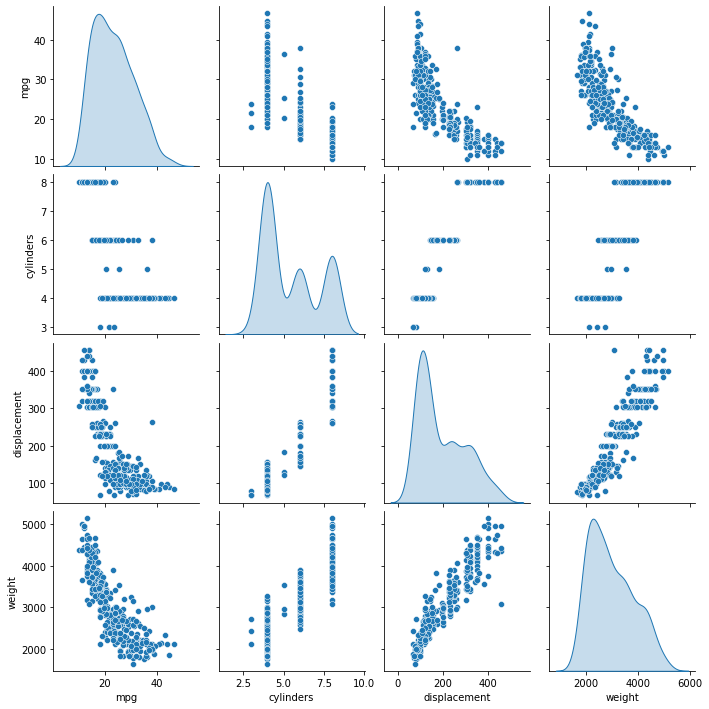

In [50]:
sns.pairplot(train_data[["mpg", 
                        "cylinders", 
                        "displacement", 
                        "weight"]], diag_kind="kde")


In [51]:
#mpg is to be predicted
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop("mpg")
test_labels = test_features.pop("mpg")

In [53]:
train_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
146,28.0,4,90.0,75.0,2125.0,14.5,74,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,3
...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,3
145,32.0,4,83.0,61.0,2003.0,19.0,74,3


In [52]:
#take a look at range of valeus in features before normalization
train_data.describe().transpose()[["mean", "std"]]

,mean,std
mpg,23.310510,7.728652
cylinders,5.477707,1.699788
displacement,195.318471,104.331589
horsepower,104.869427,38.096214
weight,2990.251592,843.898596
acceleration,15.559236,2.789230
model year,75.898089,3.675642
origin,1.573248,0.800988


In [54]:
#normalize
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)

In [55]:
normalizer.adapt(np.array(train_features))

In [56]:
print(normalizer.mean.numpy())


[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
 1.55592356e+01 7.58980942e+01 1.57324839e+00]


In [57]:
#model

def MPG_model(input):
  model = tf.keras.Sequential([
      input,
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(1)                               
  ])

  model.compile(
      loss=tf.keras.losses.mae,
      optimizer=tf.keras.optimizers.Adam(),
  )
  
  return model

In [58]:
auto_MPG_model = MPG_model(normalizer)
auto_MPG_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 7)                 15        
_________________________________________________________________
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,752
Trainable params: 4,737
Non-trainable params: 15
_________________________________________________________________


In [59]:
#train
training_history = auto_MPG_model.fit(
    train_features, 
    train_labels,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 23.1289 - val_loss: 23.3861
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.6414 - val_loss: 22.8393
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 22.0912 - val_loss: 22.1669
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 21.3611 - val_loss: 21.2609
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 20.3739 - val_loss: 20.0395
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 19.0654 - val_loss: 18.4307
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 17.4739 - val_loss: 16.8160
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 15.8667 - val_loss: 15.3811
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 14.1807 - val_loss: 13.6153
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 12.1510 - val_loss: 11.2425
Epoch 11

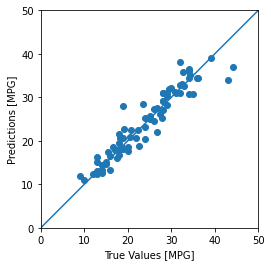

In [61]:
#test the model
test_predictions = auto_MPG_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
